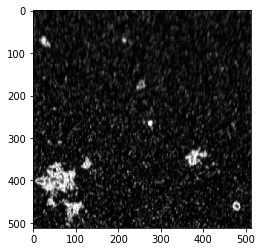

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io


orig_phantom = img_as_ubyte(io.imread(os.path.join(data_dir, r"C:\Users\ahmet\Documents\MATLAB\mathMIBIdata\beaddata\SUM_s5-c05long-60slices-f.png"),
                                      as_gray=True))
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)



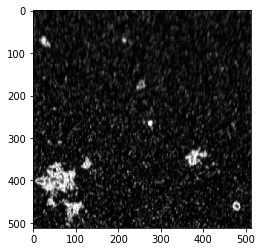

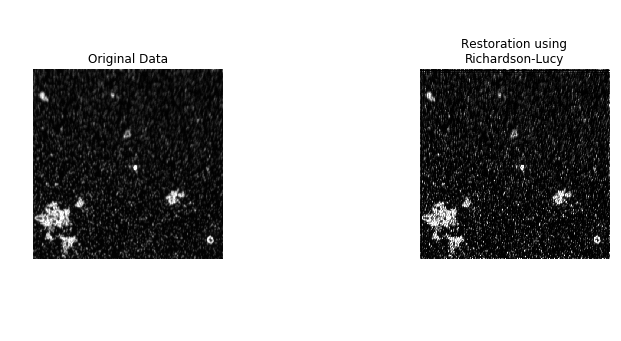

C:\Users\ahmet\Documents\ISOMICRO\Anaconda\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [52]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io 
import imageio
  

astro = img_as_ubyte(io.imread(os.path.join(data_dir, r"C:\Users\ahmet\Documents\MATLAB\mathMIBIdata\beaddata\SUM_s5-c05long-60slices-f.png"),
                                      as_gray=True))/255
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)
#astro = color.rgb2gray(data.astronaut())
#x = imread('C:\Users\ahmet\Documents\MATLAB\mathMIBIdata\beaddata\s5-c05long-60slices-f.tif')

psf = np.ones((4, 4)) / 16
#astro = conv2(astro, psf, 'same')
# Add Noise to Image
#astro_noisy = astro.copy()
#astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro, psf, iterations=15)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

#ax[1].imshow(astro_noisy)
#ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL)
#x[2].imshow(deconvolved_RL, vmin=deconvolved_RL.min(), vmax=deconvolved_RL.max())

ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()


from scipy.misc import imsave
#x = np.zeros((255, 255))
#x = np.zeros((255, 255), dtype=np.uint8)
#x[:] = np.arange(255)
imsave('Superres.tiff', deconvolved_RL)
imageio.imwrite('Superres2.png', deconvolved_RL)
